In [1]:
%matplotlib inline
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import numpy as np
import re
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [47]:
plt.rcParams["figure.figsize"]=10,10
def generateBarGraph(df, x, y):
    df.dropna(subset=[y], inplace=True)
    xList = df[x].unique()
    overall_list = {}
    for item in xList:
        overall_list[item] = df[df[x] == item][y].mean()
    plt.bar(overall_list.keys(), overall_list.values())
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x + " vs. " + y)
    return xList

In [77]:
rmp = pd.read_csv("modifiedProfInfo.csv")
rmp

,tid,tLname,tFname,gender,tDept,attendance,helpCount,id,notHelpCount,quality,...,rEasy,rEasyString,rHelpful,rInterest,rOverall,rTextBookUse,rWouldTakeAgain,takenForCredit,teacherGrade,teacherRatingTags
0,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,4.0,30218337,1.0,good,...,4.0,4.0,4.0,NaN,4.0,1.0,1.0,1.0,NaN,"['Lecture heavy', 'Caring', 'Lots of homework']"
1,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,3.0,29721878,1.0,awesome,...,3.0,3.0,5.0,NaN,5.0,1.0,1.0,1.0,NaN,"['Lots of homework', 'Caring', 'Hilarious']"
2,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,1.0,29701355,0.0,average,...,4.0,4.0,3.0,NaN,3.0,1.0,1.0,1.0,NaN,"['Accessible outside class', 'Lots of homework..."
3,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,0.0,29682099,1.0,average,...,4.0,4.0,3.0,NaN,3.0,1.0,0.0,1.0,NaN,[]
4,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,8.0,29557088,4.0,awesome,...,3.0,3.0,5.0,NaN,5.0,1.0,1.0,1.0,NaN,"['Lots of homework', 'Hilarious', 'Caring']"
5,2325936,Aamari,Eddie,1.0,Mathematics,Not Mandatory,7.0,29288327,0.0,awesome,...,2.0,2.0,5.0,NaN,5.0,1.0,1.0,1.0,4.0,"['Amazing lectures', 'Accessible outside class..."
6,286439,Abarbanel,Henry,1.0,Physics,Not Mandatory,0.0,28955886,0.0,awful,...,5.0,5.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,"['Graded by few things', 'Tough grader']"
7,286439,Abarbanel,Henry,1.0,Physics,Not Mandatory,0.0,28730130,1.0,awful,...,5.0,5.0,1.0,NaN,1.0,0.0,0.0,1.0,3.0,"['Graded by few things', 'Lecture heavy']"
8,286439,Abarbanel,Henry,1.0,Physics,Mandatory,0.0,25895906,1.0,poor,...,4.0,4.0,1.0,2.0,1.5,0.0,NaN,1.0,NaN,[]
9,286439,Abarbanel,Henry,1.0,Physics,NaN,0.0,20353335,1.0,awesome,...,1.0,1.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,[]


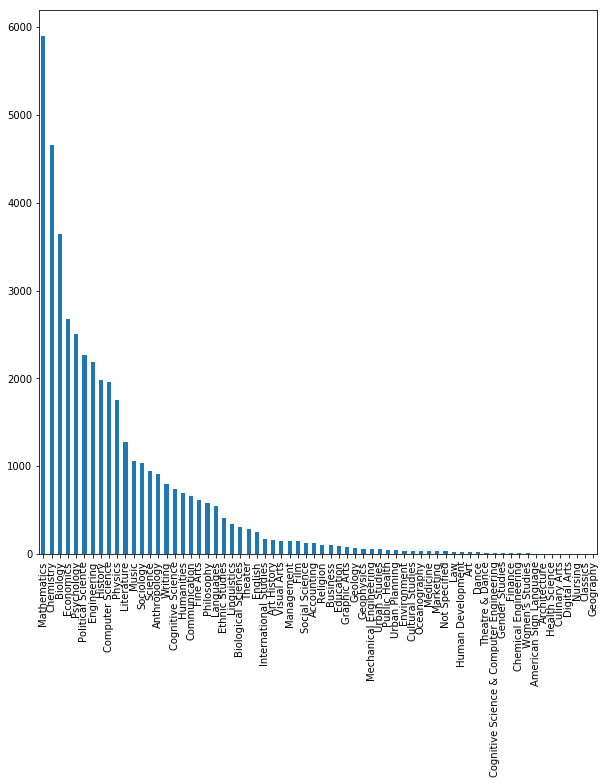

In [181]:
rmp['tDept'].value_counts().plot.bar()

In [70]:
cape = pd.read_csv("capeReviewsCleaned2.csv")
cape

,Unnamed: 0,Instructor,tLname,tFname,tDept,Course,Term,Enroll,Evals Made,Eval / Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,tid
0,0,"Goldstein, Paul S",Goldstein,Paul,ANTH,ANTH 101 - Foundations/Social Complexity (A),183,137,73,0.532847,0.812,0.791,4.00,3.33,NaN,222495
1,1,"Semendeferi, Ekaterini",Semendeferi,Ekaterini,ANTH,ANTH 196A - Honors Studies in Anthropology (A),183,13,4,0.307692,1.000,1.000,7.00,4.00,NaN,1171683
2,2,"Rothschild, Amy C",Rothschild,Amy,ANTH,ANTH 21 - Race and Racisms (A),183,212,96,0.452830,0.947,0.978,3.01,3.58,NaN,-1
3,3,"Kang, Byung Chu",Kang,Byung,ANTH,ANTH 21 - Race and Racisms (B),183,314,214,0.681529,0.942,0.937,3.36,3.82,NaN,2308255
4,4,"Stewart, Alexander B",Stewart,Alexander,ANTH,ANTH 23 - Debating Multiculturalism (A),183,407,351,0.862408,0.879,0.956,3.53,3.58,NaN,2099749
5,5,"Rivera-Collazo, Isabel C",Rivera-Collazo,Isabel,ANTH,ANTH 3 - Global Archaeology (A),183,66,47,0.712121,0.957,1.000,3.14,3.49,NaN,-1
6,6,"Semendeferi, Ekaterini",Semendeferi,Ekaterini,ANTH,ANTH 87 - Freshman Seminar (A),183,17,13,0.764706,1.000,1.000,0.50,4.00,NaN,1171683
7,7,"Liss, Brady James",Liss,Brady,ANTH,ANTH 101 - Foundations/Social Complexity (A),182,21,13,0.619048,1.000,1.000,3.83,3.17,NaN,-1
8,8,"Wilder, Linnea Lorene",Wilder,Linnea,ANTH,ANTH 102 - Humans Are Cultural Animals (A),182,38,13,0.342105,1.000,0.833,2.81,3.50,3.72,-1
9,9,"Hrvoj Mihic, Branka",Hrvoj Mihic,Branka,ANTH,ANTH 2 - Human Origins (A),182,21,7,0.333333,0.857,1.000,4.17,3.75,3.58,2191664


array(['ANTH', 'BENG', 'CAT', 'CENG', 'CGS', 'CHEM', 'CHIN', 'COGS',
       'COMM', 'CONT', 'CSE', 'DOC', 'ECE', 'ECON', 'EDS', 'ENVR', 'ERC',
       'ESYS', 'ETHN', 'FILM', 'FPMU', 'HDP', 'HMNR', 'HUM', 'ICAM',
       'INTL', 'JAPN', 'JUDA', 'LATI', 'LAWS', 'MAE', 'MATH', 'MMW',
       'MUIR', 'MUS', 'PHIL', 'PHYS', 'POLI', 'PSYC', 'RELI', 'REV', 'SE',
       'SIO', 'SOCI', 'SOCE', 'SOCA', 'SOCB', 'SOCC', 'SOCD', 'SOCL',
       'STPA', 'SXTH', 'TMC', 'TWS', 'USP', 'VIS', 'WARR', 'WCWP'],
      dtype=object)

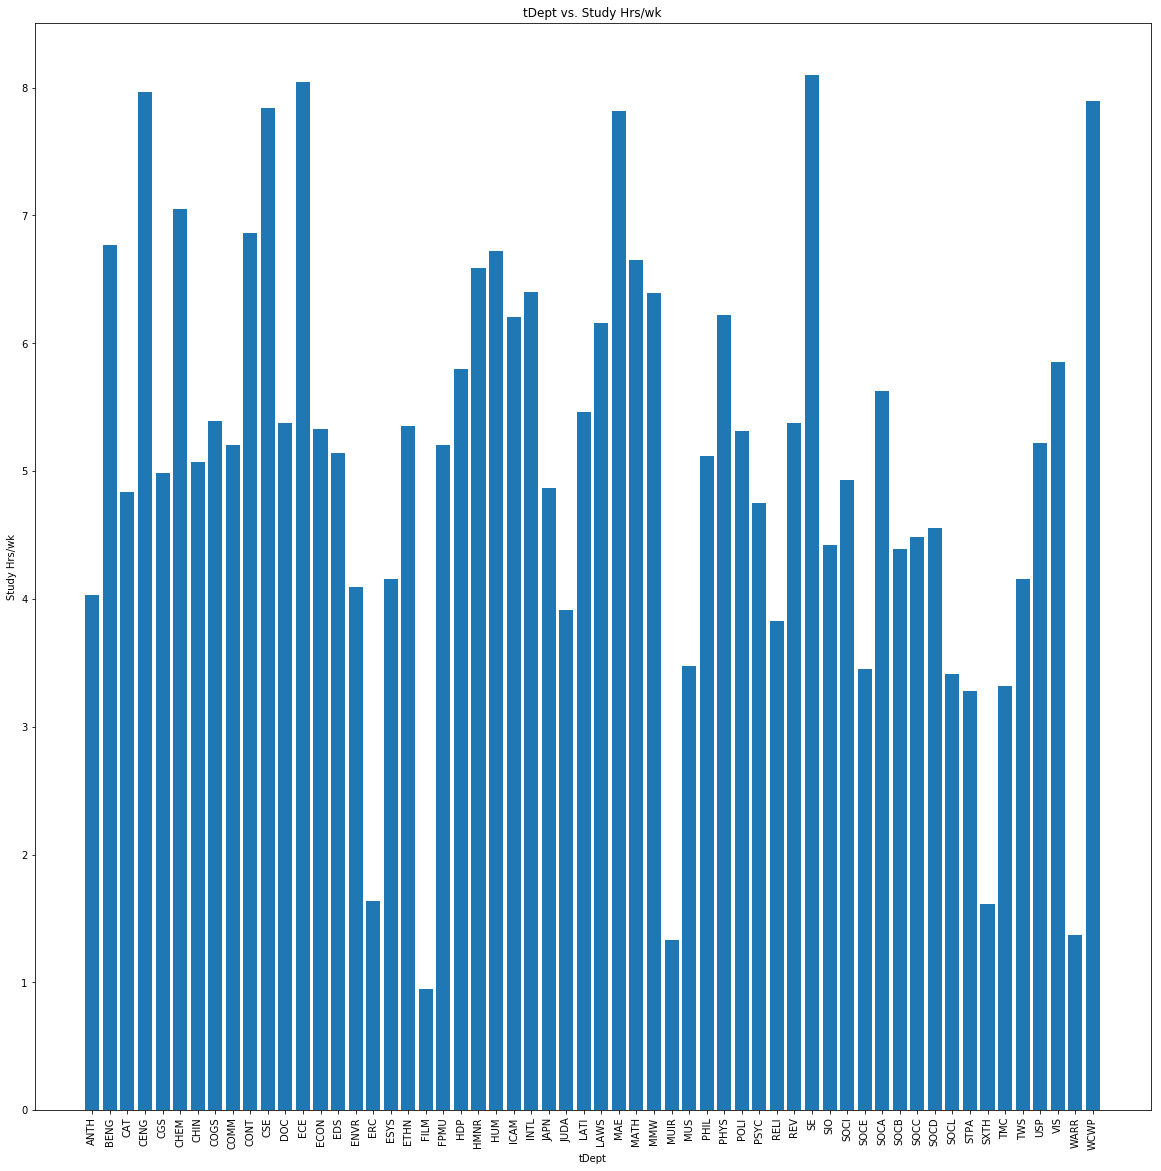

In [11]:
generateBarGraph(cape, 'tDept', 'Study Hrs/wk')

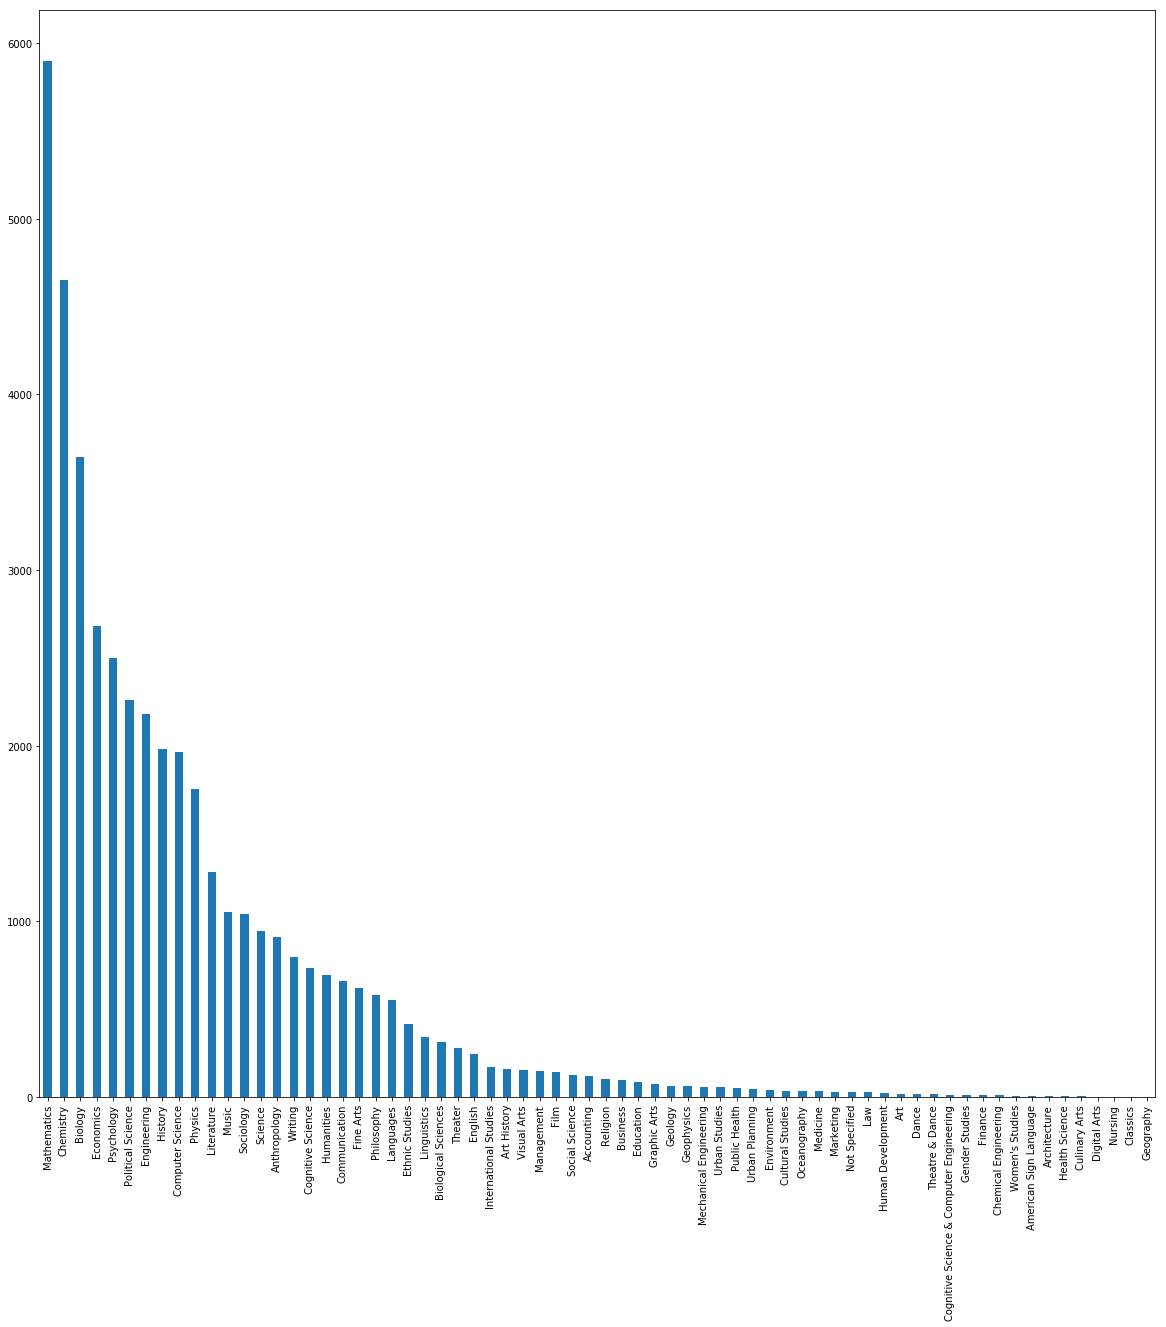

In [12]:
rmp['tDept'].value_counts().plot.bar()

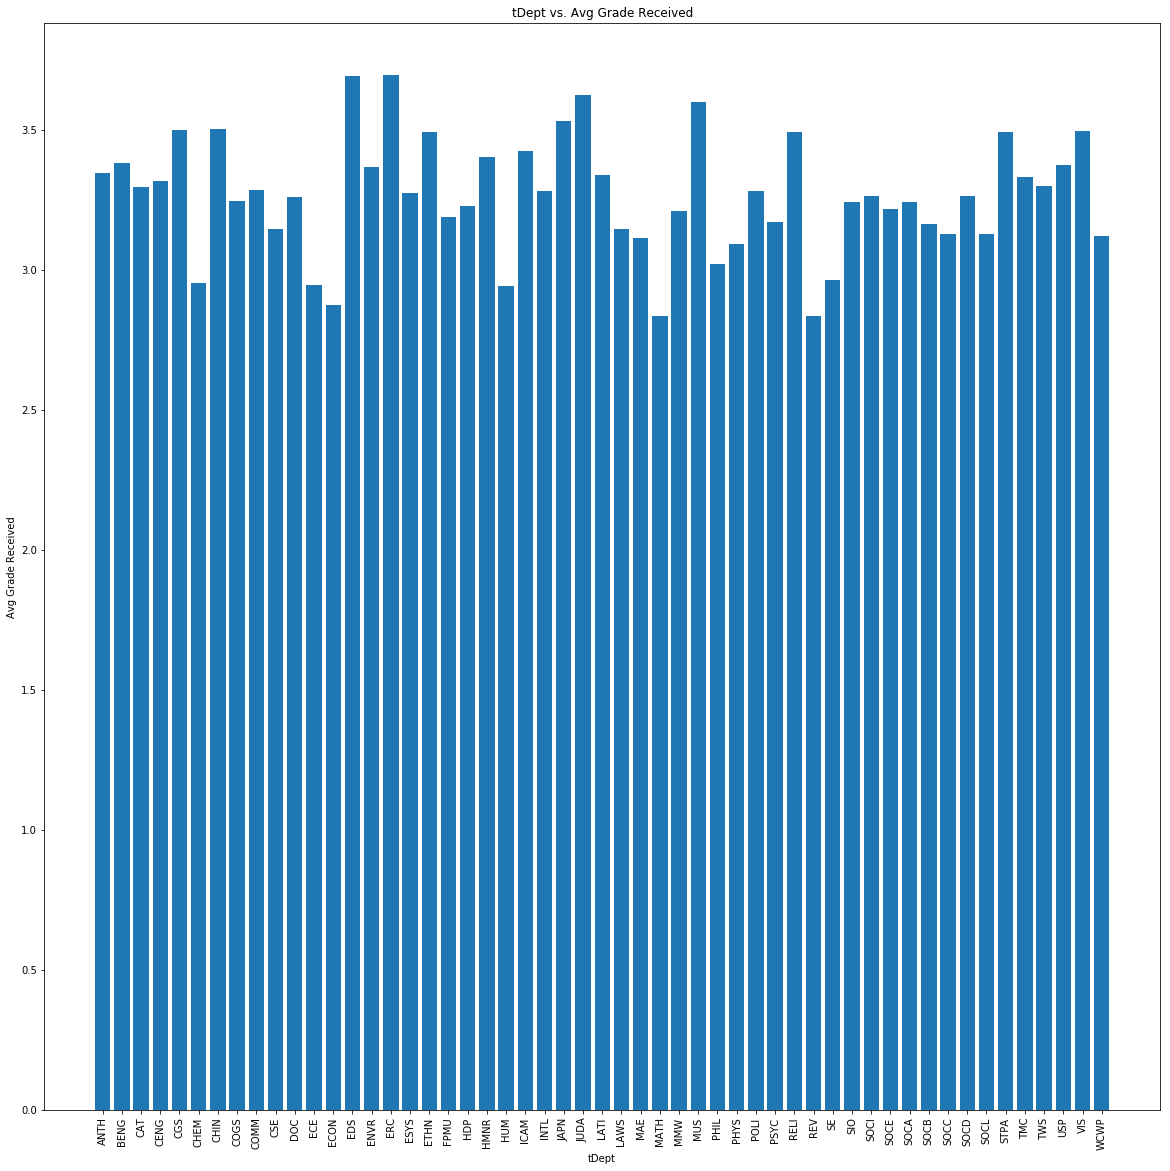

In [14]:
grade_dict = generateBarGraph(cape, 'tDept', 'Avg Grade Received')

In [209]:
df = pd.read_csv("FullData.csv")
df['tid'] = df['tid'].apply(lambda x: str(x))

In [210]:
df.corr()

,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll,rmp Evals
gender,1.000000,0.076551,0.056402,-0.170901,-0.064318,-0.034920,0.163336,-0.182918,-0.205298,0.084646,-0.011822,-0.020919,-0.017517,0.030362,0.017334,0.013582,-0.047600,0.086290
Enroll,0.076551,1.000000,0.962361,-0.123082,0.030946,0.075839,0.055707,-0.017448,-0.042050,-0.001720,0.036227,0.017315,0.046158,0.012029,-0.014710,0.051282,-0.097322,0.695950
Evals Made,0.056402,0.962361,1.000000,-0.008690,0.042130,0.097572,0.072085,-0.026153,-0.035027,0.005367,0.056516,0.028833,0.066273,0.020620,-0.022318,0.062323,-0.098366,0.687829
Eval/Enroll,-0.170901,-0.123082,-0.008690,1.000000,0.090644,0.148152,-0.082717,0.013844,0.098760,-0.030084,0.105804,0.040461,0.113732,0.015672,-0.046596,0.055087,0.068208,-0.063970
Rcmnd Class,-0.064318,0.030946,0.042130,0.090644,1.000000,0.704382,-0.175021,0.481200,0.219124,-0.277107,0.435628,0.357271,0.447875,0.303935,0.120871,0.334031,0.048307,-0.004389
Rcmnd Instr,-0.034920,0.075839,0.097572,0.148152,0.704382,1.000000,-0.166881,0.388413,0.264166,-0.274155,0.575560,0.338115,0.607847,0.374810,0.179245,0.434771,0.036704,0.016406
Study Hrs/wk,0.163336,0.055707,0.072085,-0.082717,-0.175021,-0.166881,1.000000,-0.481949,-0.331798,0.380900,-0.073987,-0.016655,-0.087637,-0.091688,-0.066102,-0.063407,-0.041253,0.000213
Avg Grade Expected,-0.182918,-0.017448,-0.026153,0.013844,0.481200,0.388413,-0.481949,1.000000,0.758011,-0.465803,0.200311,0.217549,0.214171,0.131856,0.250663,0.183177,0.075379,-0.084379
Avg Grade Received,-0.205298,-0.042050,-0.035027,0.098760,0.219124,0.264166,-0.331798,0.758011,1.000000,-0.381679,0.184626,0.226747,0.189124,0.067661,0.323149,0.180095,0.037208,-0.133213
rEasy,0.084646,-0.001720,0.005367,-0.030084,-0.277107,-0.274155,0.380900,-0.465803,-0.381679,1.000000,-0.445659,-0.200860,-0.443564,-0.293729,-0.294476,-0.402812,-0.015361,0.034486


In [17]:
df[df['tDept'] == "CSE"].corr()

,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll
gender,1.000000,-0.091297,-0.179373,-0.354647,-0.038310,-0.102952,0.124091,0.038832,0.258286,-0.006456,-0.035864,0.052310,-0.035601,-0.178497,0.040242,-0.055437,-0.040806
Enroll,-0.091297,1.000000,0.958640,-0.059722,0.153707,0.119219,-0.070469,0.243151,0.095222,-0.089984,0.044259,0.178458,0.038927,-0.067886,0.094142,0.080236,-0.234250
Evals Made,-0.179373,0.958640,1.000000,0.132252,0.209736,0.173434,-0.010764,0.254152,0.067149,-0.081737,0.107226,0.216719,0.099315,0.008495,0.068966,0.115784,-0.210250
Eval/Enroll,-0.354647,-0.059722,0.132252,1.000000,0.068039,0.153819,0.056827,-0.013864,-0.209378,0.158131,0.189371,0.043946,0.176989,0.274726,-0.046864,0.086092,0.105223
Rcmnd Class,-0.038310,0.153707,0.209736,0.068039,1.000000,0.661684,-0.025618,0.517879,0.384941,-0.419857,0.487235,0.496498,0.493298,0.351845,0.371231,0.504237,0.000033
Rcmnd Instr,-0.102952,0.119219,0.173434,0.153819,0.661684,1.000000,0.069770,0.263242,0.214820,-0.342087,0.758881,0.585540,0.776816,0.444343,0.305012,0.683809,0.012349
Study Hrs/wk,0.124091,-0.070469,-0.010764,0.056827,-0.025618,0.069770,1.000000,-0.324048,-0.172157,0.045956,0.254659,0.238304,0.255238,0.041860,0.178354,0.061408,0.192261
Avg Grade Expected,0.038832,0.243151,0.254152,-0.013864,0.517879,0.263242,-0.324048,1.000000,0.720186,-0.531857,0.183225,0.092809,0.167089,0.217435,0.260632,0.210934,-0.146686
Avg Grade Received,0.258286,0.095222,0.067149,-0.209378,0.384941,0.214820,-0.172157,0.720186,1.000000,-0.526252,0.239336,0.122517,0.223365,0.090537,0.318777,0.330615,-0.278453
rEasy,-0.006456,-0.089984,-0.081737,0.158131,-0.419857,-0.342087,0.045956,-0.531857,-0.526252,1.000000,-0.428436,-0.187991,-0.403778,-0.229058,-0.415962,-0.313504,0.078576


In [18]:
df[df['tDept'] == "COGS"].corr()

,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll
gender,1.000000,-0.301733,-0.305883,0.137423,-0.031680,0.107737,0.192893,0.072346,0.273333,0.034776,0.044671,0.210015,0.067013,-0.171705,-0.060202,0.039282,0.211222
Enroll,-0.301733,1.000000,0.994498,-0.056319,0.077772,-0.040356,-0.059760,-0.020167,-0.128795,0.110764,-0.213202,-0.183071,-0.168044,-0.155433,-0.172768,-0.050531,-0.179650
Evals Made,-0.305883,0.994498,1.000000,0.003137,0.095428,-0.019083,-0.073921,-0.026940,-0.132002,0.098939,-0.188525,-0.180956,-0.142533,-0.136329,-0.175593,-0.030193,-0.187901
Eval/Enroll,0.137423,-0.056319,0.003137,1.000000,-0.068421,-0.079201,-0.143845,-0.089728,-0.061324,-0.062800,0.213482,-0.080574,0.201628,0.381050,0.074059,0.006408,-0.262417
Rcmnd Class,-0.031680,0.077772,0.095428,-0.068421,1.000000,0.730801,-0.290169,0.077570,0.108649,-0.271488,0.344387,0.448007,0.399795,-0.142665,-0.116717,0.405467,0.163508
Rcmnd Instr,0.107737,-0.040356,-0.019083,-0.079201,0.730801,1.000000,-0.250043,0.240791,0.315152,-0.274261,0.477668,0.143705,0.533184,-0.007379,0.107702,0.589704,0.086074
Study Hrs/wk,0.192893,-0.059760,-0.073921,-0.143845,-0.290169,-0.250043,1.000000,-0.087149,0.305267,0.517684,-0.197160,0.157603,-0.225235,-0.158404,0.061135,-0.005424,0.016895
Avg Grade Expected,0.072346,-0.020167,-0.026940,-0.089728,0.077570,0.240791,-0.087149,1.000000,0.711216,-0.240540,0.021324,-0.185161,0.031970,-0.004169,0.340258,-0.052326,0.215454
Avg Grade Received,0.273333,-0.128795,-0.132002,-0.061324,0.108649,0.315152,0.305267,0.711216,1.000000,0.017752,0.185432,0.171229,0.190227,0.087244,0.302523,0.179987,0.217717
rEasy,0.034776,0.110764,0.098939,-0.062800,-0.271488,-0.274261,0.517684,-0.240540,0.017752,1.000000,-0.335134,-0.107677,-0.310714,-0.210643,-0.384296,-0.201312,-0.015403


In [19]:
df[df['Avg Grade Received'] < 3.0].corr()

,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll
gender,1.000000,0.000981,-0.019792,-0.200423,-0.018816,0.012431,0.125013,-0.113103,-0.077580,0.004289,0.075737,-0.029350,0.057952,0.017314,0.096609,0.065289,-0.087735
Enroll,0.000981,1.000000,0.963534,-0.109750,0.128496,0.156993,0.033756,0.090786,0.108100,-0.040953,0.091453,0.091461,0.111574,-0.022605,-0.000887,0.100872,-0.164572
Evals Made,-0.019792,0.963534,1.000000,0.017468,0.137646,0.175976,0.058048,0.071361,0.115782,-0.030473,0.110206,0.097950,0.128037,-0.006464,-0.007016,0.110576,-0.157576
Eval/Enroll,-0.200423,-0.109750,0.017468,1.000000,0.073327,0.169050,-0.030617,-0.064469,0.045199,0.018492,0.103178,-0.045520,0.109351,0.028023,-0.089503,0.019303,0.123235
Rcmnd Class,-0.018816,0.128496,0.137646,0.073327,1.000000,0.624534,-0.064431,0.529980,0.175201,-0.210920,0.379966,0.351693,0.409897,0.282695,0.057387,0.287189,-0.048523
Rcmnd Instr,0.012431,0.156993,0.175976,0.169050,0.624534,1.000000,-0.053222,0.345435,0.202700,-0.217440,0.593690,0.349996,0.648087,0.361390,0.068285,0.413569,-0.037917
Study Hrs/wk,0.125013,0.033756,0.058048,-0.030617,-0.064431,-0.053222,1.000000,-0.454281,-0.225483,0.280842,0.072347,0.108589,0.062086,-0.021812,-0.055476,0.018358,-0.078300
Avg Grade Expected,-0.113103,0.090786,0.071361,-0.064469,0.529980,0.345435,-0.454281,1.000000,0.447300,-0.342174,0.126114,0.148541,0.143921,0.136289,0.142487,0.103321,-0.078605
Avg Grade Received,-0.077580,0.108100,0.115782,0.045199,0.175201,0.202700,-0.225483,0.447300,1.000000,-0.104840,0.058357,0.167650,0.071299,0.018877,0.154917,0.052884,-0.134992
rEasy,0.004289,-0.040953,-0.030473,0.018492,-0.210920,-0.217440,0.280842,-0.342174,-0.104840,1.000000,-0.420842,-0.160077,-0.399913,-0.219222,-0.204609,-0.405570,0.114561


In [20]:
dept_avg = {}
depts = df['tDept'].unique()
for d in depts:
    dept_avg[d] = df[df['tDept'] == d]['Avg Grade Received'].mean()

pd.Series(dept_avg).sort_values()

MATH    2.774709
ECE     2.810108
ECON    2.888452
CHEM    2.917917
SE      2.928155
SOCC    2.950000
HUM     2.973548
PHYS    2.993107
MAE     2.995989
PHIL    3.024313
CSE     3.060935
WARR    3.090353
PSYC    3.093021
SOCB    3.110000
SOCD    3.130000
ENVR    3.174625
SIO     3.175335
HDP     3.183692
POLI    3.186142
FPMU    3.200729
TMC     3.207460
COMM    3.209060
CENG    3.209830
MMW     3.210969
DOC     3.212188
ESYS    3.236430
BENG    3.246641
INTL    3.247469
WCWP    3.255083
COGS    3.270045
SOCI    3.277012
ERC     3.285073
TWS     3.292955
CAT     3.307133
LATI    3.311359
LAWS    3.325166
ANTH    3.328852
HMNR    3.358507
USP     3.376994
FILM    3.416794
CGS     3.423757
ETHN    3.426419
CHIN    3.466419
VIS     3.469039
EDS     3.470549
RELI    3.479682
JAPN    3.494849
MUS     3.515269
ICAM    3.572302
JUDA    3.646548
REV          NaN
CONT         NaN
dtype: float64

In [111]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()[:30]

rmp Evals           rmp Evals             1.000000
rOverall            rHelpful              0.974086
Enroll              Evals Made            0.962361
Avg Grade Received  Avg Grade Expected    0.758011
sentimentValue      rOverall              0.718002
Rcmnd Instr         Rcmnd Class           0.704382
rHelpful            sentimentValue        0.698630
Enroll              rmp Evals             0.695739
rmp Evals           Evals Made            0.687411
rOverall            rWouldTakeAgain       0.628820
rWouldTakeAgain     rHelpful              0.628744
Rcmnd Instr         rOverall              0.607847
rHelpful            Rcmnd Instr           0.575560
rWouldTakeAgain     sentimentValue        0.506337
Rcmnd Class         Avg Grade Expected    0.481200
                    rOverall              0.447875
                    rHelpful              0.435628
rOverall            rInterest             0.435078
sentimentValue      Rcmnd Instr           0.434771
rHelpful            rInterest  

In [22]:
# splits a dataframe into fourths by index
def split_4_df(df):
    numRows = len(df.index)
    l = [int(numRows*.25), int(numRows*.5), int(numRows*.75), numRows]
    l_mod = [0] + l + [max(l)+1]
    list_of_dfs = [df_sorted.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]
    list_of_dfs.pop(4)
    return list_of_dfs

In [23]:
# splits a dataframe into halves by index
def split_2_df(df):
    numRows = len(df.index)
    list_of_dfs = [None]*2
    list_of_dfs[0] = df[:int(numRows/2)]
    list_of_dfs[1] = df[int(numRows/2):]
    return list_of_dfs

In [162]:
# takes an array of values and a string, plots the distribution with the given string as the title and
#  calculates mean and normality
def plotNormal(data, str_in):
    alpha = 0.01
    xs = np.arange(data.min(), data.max(), 0.1)
    fit = stats.norm.pdf(xs, np.mean(data), np.std(data))
    plt.figure()
    plt.plot(xs, fit, label='Normal Dist.', lw=4)
    plt.hist(data, density=True, label='Actual Data');
    plt.title(str_in)
    plt.legend();
    print("mean: " + str(data.mean()))
    print(normaltest(data))
    s, p = normaltest(data)
    if(p > alpha):
        print("Distribution is Normal")
    else:
        print("Distribution is not Normal")

### Checking for normality of distribution in grades received
Here we check if there is a normal distribution for gpa's on CAPE's reviews for our overall sample in order to better interpret our data moving forward.

mean: 3.1024151837843923
NormaltestResult(statistic=0.6140201126327857, pvalue=0.7356432030092538)
Distribution is Normal


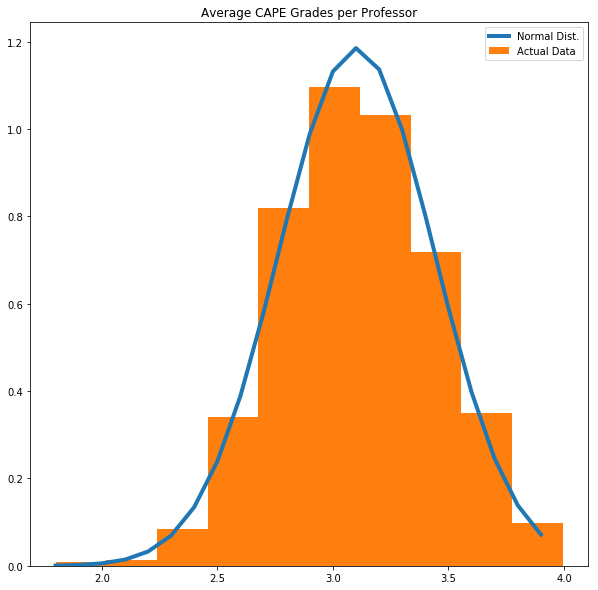

In [247]:
#checking for normal distribution for grades vs eval/enroll
avg_grades = df['Avg Grade Received'].dropna().values
plotNormal(avg_grades, "Average CAPE Grades per Professor")

Here we see that average grades received on CAPE's are distributed normally with a mean of 3.10

Now lets compare this to the distribution of reported grades on RateMyProfessor.

mean: 3.5874768617887134
NormaltestResult(statistic=541.2647253247932, pvalue=2.923198258531064e-118)
Distribution is not Normal


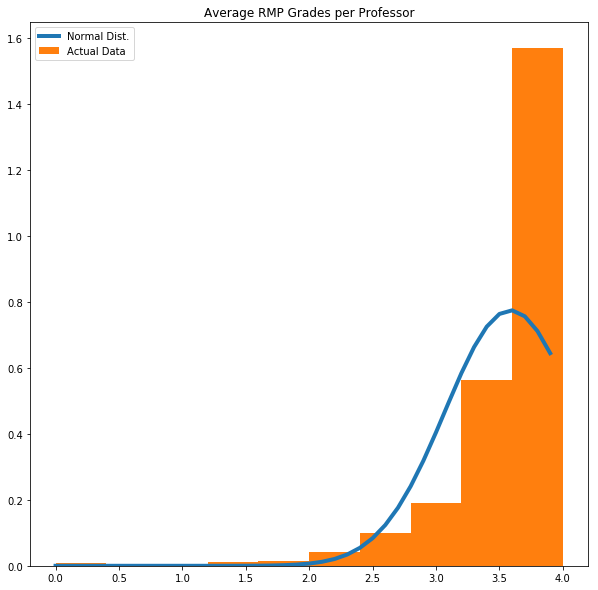

In [248]:
rmp_grades =  df['rmp Grade'].dropna().values
plotNormal(rmp_grades, "Average RMP Grades per Professor")


As you can see, the average grades reported for each professor on RMP does is NOT normally distributed and in fact skews left and has a mean GPA of 3.59. This data, when compared with the more accurate grade distributions from CAPE's, suggests that either students are more likely to post a review on RMP if they receive a higher grade from their professor, or that they are more likely to report their grade on RMP when recieving a higher grade (this is a possibility because reporting your grade on RMP is optional when posting a review). 

Either way, what we can conclude is that students are more likely to post a review with their grade on RMP when they receive a higher grade from their professor.

To learn more, we will check the mean and distribution of CAPE grades received for professors that have no reported grades on their RMP reviews. If it is the case that students are in fact more likely to report their grade on rmp when they recieve a higher grade in the class, we expect that this data would have a lower mean.

mean: 3.0956733237818046
NormaltestResult(statistic=0.3571100561964164, pvalue=0.8364780258159497)
Distribution is Normal


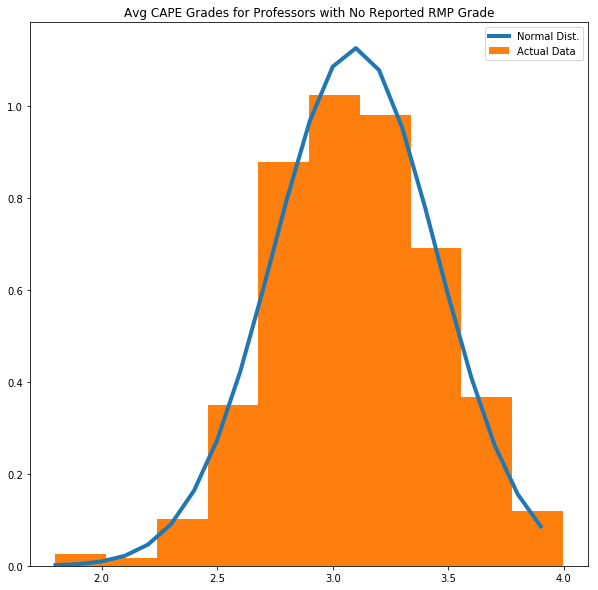

In [249]:
rmp_nan_grades = df[pd.isnull(df['rmp Grade'])]
rmp_nan_grades = rmp_nan_grades['Avg Grade Received'].dropna().values
plotNormal(rmp_nan_grades, "Avg CAPE Grades for Professors with No Reported RMP Grade")

We can see there is a normal distribution of grades with a mean of 3.10, demonstrating little difference compared to the mean and distribution of CAPE grades for all the professors. This shows that overall, a professor not having a single grade reported on RMP is independent of the average grades they give to students. Although not conclusive, the data seems to suggest that when reviewing a professor on RMP, students are not more nor less likely to report their grade depending on how well they did. However, more analysis is needed.

To further test whether students are more likely to make a review on RMP when they get a higher grade, we will check the distribution of CAPE grades given by professors split by their rmp-Evals/Enroll value, which represents the proportion a students a professor has had that made a review on RMP. We will check the mean/distribution of CAPE gpa to see any potential differences.

After splitting our data in two based on their proportion of RMP evaluations, we will check the mean and distribution of the CAPE grades and run a t-test to measure a significant difference, using an alpha of 0.01.

In [252]:
def checkSignificance(a, b):
    alpha = 0.01
    print(stats.ttest_ind(a, b, axis=None))
    s, p = stats.ttest_ind(a, b, axis=None)
    if(p < alpha):
        print("Difference is Significant")
        return True
    print("Difference is not Significant")
    return False

mean: 3.1397595784391226
NormaltestResult(statistic=3.6915350721547604, pvalue=0.15790407729009598)
Distribution is Normal
mean: 3.0651237599022223
NormaltestResult(statistic=0.1226578306622543, pvalue=0.9405138394746073)
Distribution is Normal
Ttest_indResult(statistic=4.184251460327653, pvalue=3.038234060825282e-05)
Difference is Significant


True

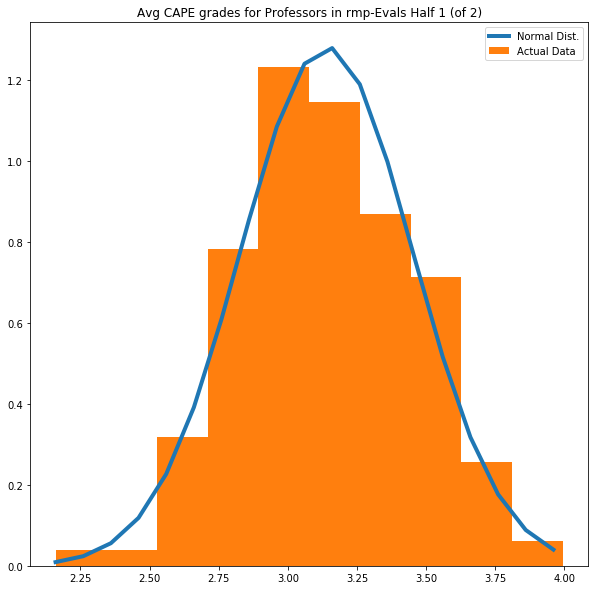

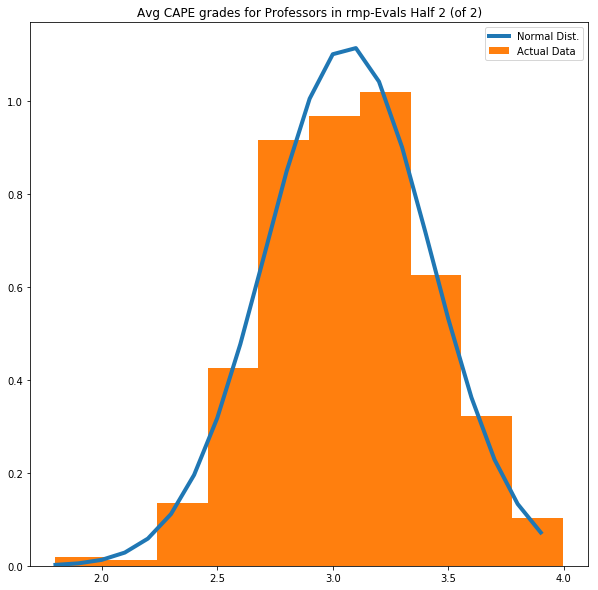

In [253]:
df_list2 = split_2_df(df.sort_values(by=['rmp Evals/Enroll']).dropna(subset=['Avg Grade Received']))
i = 0
#df_list2[1] = df_list2[1].drop(df_list2[1].index[len(df_list2[1])-1])
for d in df_list2:
    i = i + 1
    title = "Avg CAPE grades for Professors in rmp-Evals Half " + str(i) + " (of " + str(len(df_list2)) + ")"
    plotNormal(d['Avg Grade Received'].dropna().values, title)

checkSignificance(df_list2[0]['Avg Grade Received'].values, df_list2[1]['Avg Grade Received'].values)



The first Graph represents data for professors in the lower half of values for rmp-Evals/Enroll, and the second graph represents professors in the upper half. From the data we can see a difference in mean GPA and that the difference is statistically significant. The data shows a possibility that students with a lower GPA are more likely to post a reivew on RMP, but is not enough to allow us to conclude the average GPA given by a professor directly affects the proportion of students who post a review on RMP.



Now we will run an ordinary least squares regression model

In [366]:
df_ols = df[["Avg Grade Received", "rmp Evals/Enroll", 'tDept']].dropna()
outcome_1, predictors_1 = patsy.dmatrices('Q("rmp Evals/Enroll") ~ Q("Avg Grade Received")', df_ols)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("rmp Evals/Enroll")   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     1.951
Date:                   Sun, 17 Mar 2019   Prob (F-statistic):              0.163
Time:                           01:44:50   Log-Likelihood:                 2173.6
No. Observations:                   1409   AIC:                            -4343.
Df Residuals:                       1407   BIC:                            -4333.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Using an alpha of 0.05, the data does not support the idea that GPA influences the proportion of rmp evals for a professor.

In [138]:
def perDept(column, avg):
    eval_dict = {}
    depts = df['tDept'].unique()
    for d in depts:
        if(avg == True):
            eval_dict[d] = df[df["tDept"] == d][column].values.mean()
        else:
            eval_dict[d] = df[df["tDept"] == d][column].values.sum()

    #grab the top ten evaluations
    sorted_by_value = sorted(eval_dict.items(), key=lambda kv: kv[1], reverse=True)
    courses = [course[0] for course in sorted_by_value]
    values = [course[1] for course in sorted_by_value]
    
    return pd.Series(values,index=courses, name=column)  


### Beginning Analysis
First, we will check the average number of evaluations made per professor on Rate My Professor (RMP) for each department and check the overall mean and distribution. We will also test for normality.

mean: 17.59764859568909
NormaltestResult(statistic=1586.9326914669682, pvalue=0.0)
Distribution is not Normal


Text(0.5,1,'Average RMP Evals for each Department')

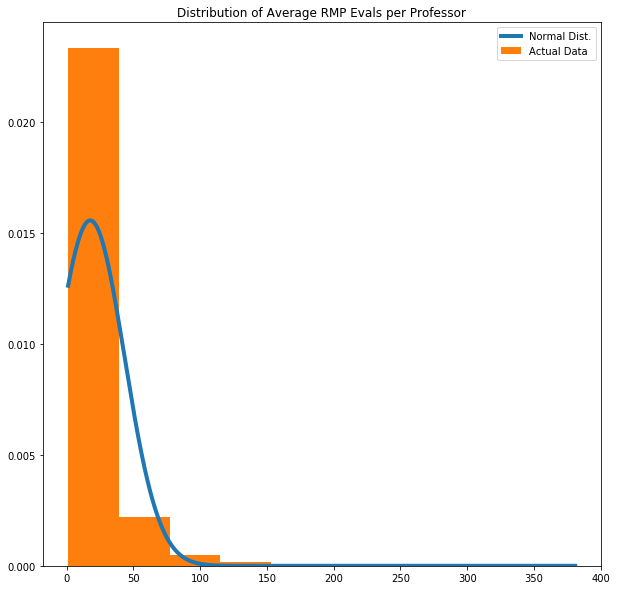

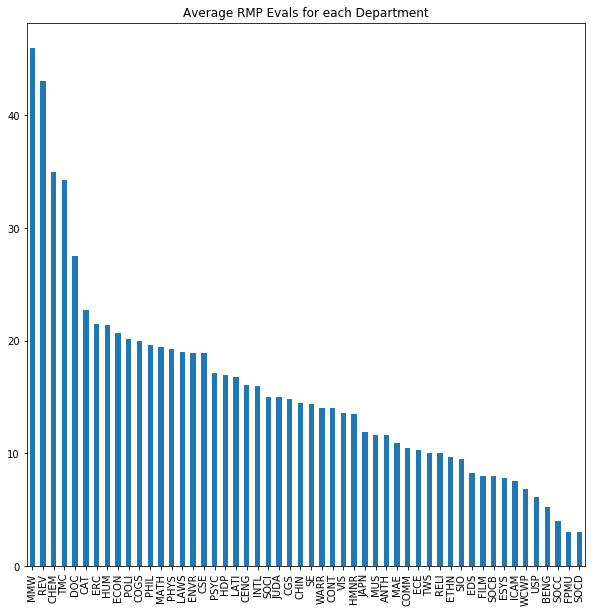

In [368]:
evals_per_dept = perDept("rmp Evals", True)
plotNormal(evals_per_dept.values, "Distribution of Average RMP Evals per Professor")
plt.figure()
evals_per_dept.plot.bar()
plt.title("Average RMP Evals for each Department")

According to the test, the average number of RMP evaluations per department is not evenly distributed. For now, we will compare MATH (the department with the highest number of professors) with CHEM (the highest average rmp-evals with a sizable department). To confirm the significance of the disparity in reviews, we will check for a normal distribution of evals within the department and run a t-test for both departments on the collumn "rmp Evals."

mean: 0.045184458688447005
NormaltestResult(statistic=431.2702620759702, pvalue=2.2431198868819246e-94)
Distribution is not Normal
mean: 0.06075113093239893
NormaltestResult(statistic=197.2522744805372, pvalue=1.469646298356031e-43)
Distribution is not Normal


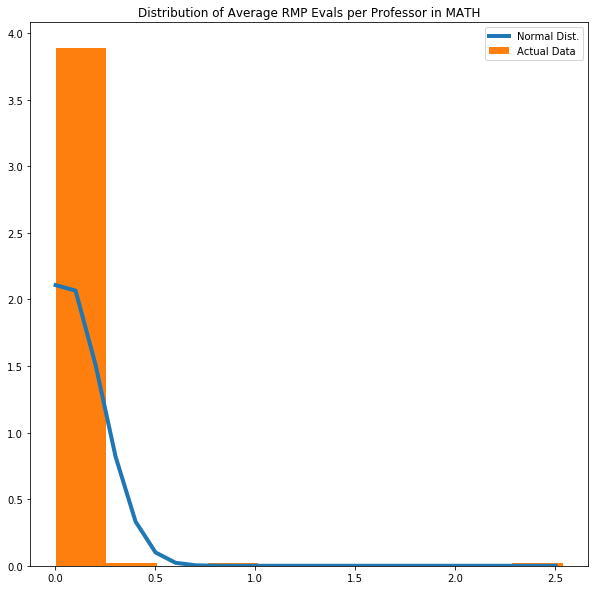

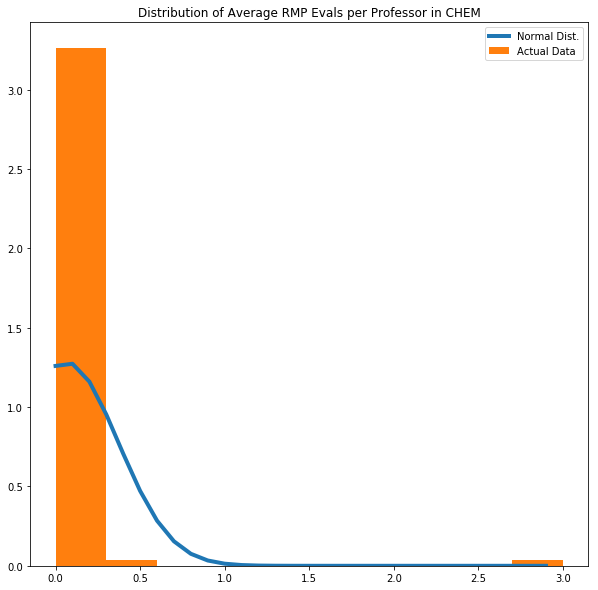

In [202]:
df_math = df[df['tDept'] == "MATH"]
df_chem = df[df['tDept'] == "CHEM"]
plotNormal(df_math['rmp Evals/Enroll'].values, "Distribution of Average RMP Evals per Professor in MATH")
plotNormal(df_chem['rmp Evals/Enroll'].values, "Distribution of Average RMP Evals per Professor in CHEM")

In [208]:
df.sort_values(by=['rmp Evals/Enroll'])
rmp[rmp['tid'] == "2011356"]

,tid,tLname,tFname,gender,tDept,attendance,helpCount,id,notHelpCount,quality,...,rEasy,rEasyString,rHelpful,rInterest,rOverall,rTextBookUse,rWouldTakeAgain,takenForCredit,teacherGrade,teacherRatingTags
42629,2011356,Gocsik,Karen,-1.0,Writing,Mandatory,0.0,28462899,0.0,awesome,...,4.0,4.0,5.0,NaN,5.0,1.0,1.0,1.0,4.0,"['Gives good feedback', 'Get ready to read', '..."


In [186]:
checkSignificance(df_mmw['rmp Evals'].values, df_cogs['rmp Evals'].values)

Ttest_indResult(statistic=-3.4154020259410354, pvalue=0.00072375925727013)
Difference is Significant


True

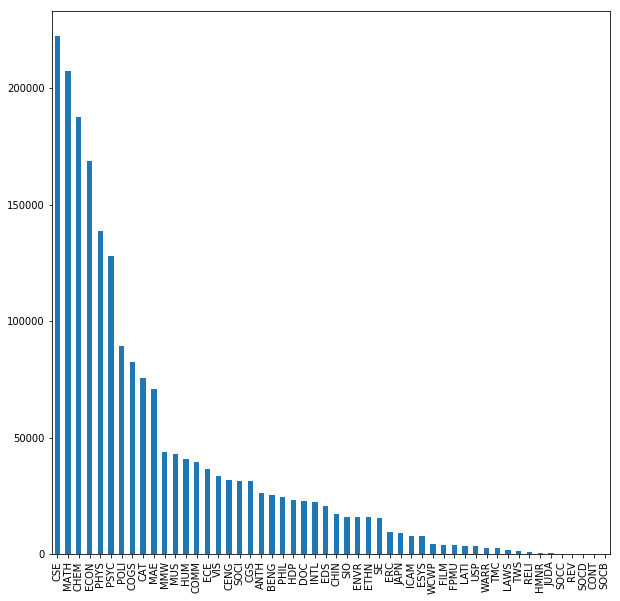

In [152]:
enroll_per_dept = perDept("Enroll", False)
enroll_per_dept.plot.bar()

In [ ]:
df

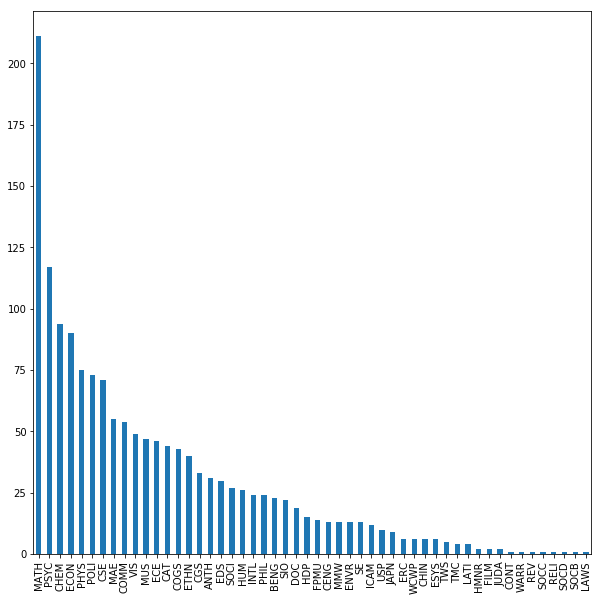

In [182]:
df['tDept'].value_counts().plot.bar()

# Gender Stuff

We will separate the professors by gender into two dataframes.

In [213]:
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == -1]

We want to check if there is a significant difference in sentiment values on RMP between male and female professors. To do this, we will first need to clean up the data and check for a normal distribution of sentiment values. To make the data more accurate, for this part, we will remove professors with an rmp-Evals/Enroll ratio that is greater than 1, as well as those with 3 or fewer reviews on RMP since too few reviews result in more extreme ratings as the averages are determined by only 1-3 reviewers, and these cases represent a very small portion of the data. In addition, we will run a Box Cox transformation on the sentiment values to normalize them, as they are skewed by their nature.

mean: 0.17685687909030998
NormaltestResult(statistic=4.262861780779221, pvalue=0.11866737230925256)
Distribution is Normal
mean: 0.17448997448453976
NormaltestResult(statistic=0.010136970259383402, pvalue=0.9949443379673569)
Distribution is Normal


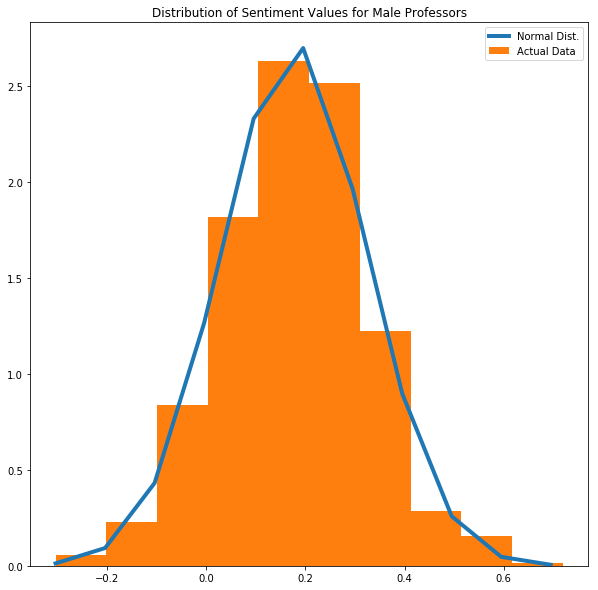

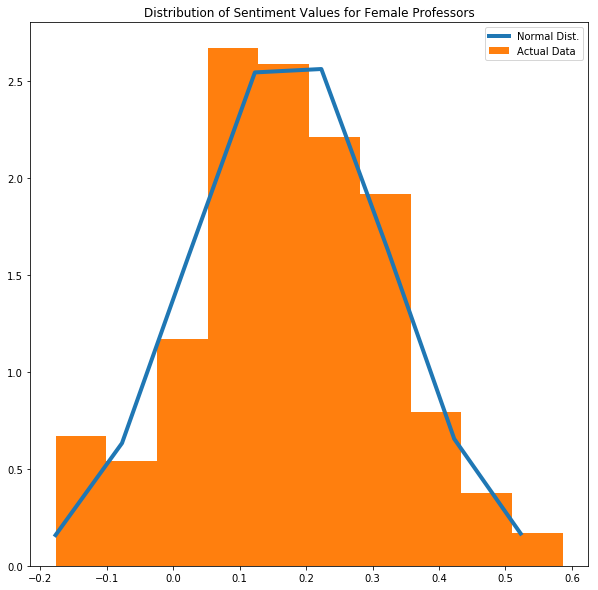

In [339]:
temp = df[df["rmp Evals/Enroll"] < 1]
temp = temp[temp["rmp Evals"] > 3]
df_male = temp[temp['gender'] == 1]
df_female = temp[temp['gender'] == -1]
sent_male = stats.boxcox(df_male["sentimentValue"].values + 1)[0]
sent_female = stats.boxcox(df_female["sentimentValue"].values + 1)[0]
plotNormal(sent_male,"Distribution of Sentiment Values for Male Professors")
plotNormal(sent_female, "Distribution of Sentiment Values for Female Professors")

We can see that the average sentiment value between male and female professors is very close. But is the difference statistically significant? Here we check by running a t-test with an alpha of 0.01.

In [326]:
checkSignificance(sent_male, sent_female)

Ttest_indResult(statistic=0.2361560309133833, pvalue=0.813360004706406)
Difference is not Significant


False

It seems that there is no significant difference in sentiment between the genders on RMP.

In [357]:
temp['gender'] = temp['gender'].apply(lambda x: str(x))
outcome_1, predictors_1 = patsy.dmatrices('sentimentValue ~ gender + rOverall', temp)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         sentimentValue   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     941.9
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.58e-230
Time:                        00:58:22   Log-Likelihood:                 1132.7
No. Observations:                1001   AIC:                            -2259.
Df Residuals:                     998   BIC:                            -2245.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3045      0.012    -26.386

In [322]:
temp['Avg Grade Received'].corr()

,gender,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,rmp Evals/Enroll,rmp Evals
gender,1.000000,0.066978,0.043744,-0.192853,-0.054371,-0.040132,0.170516,-0.180176,-0.191136,0.089347,-0.024038,-0.019336,-0.032787,0.007445,0.025067,0.006881,-0.065654,0.081692
Enroll,0.066978,1.000000,0.959827,-0.122952,0.055805,0.098199,0.077243,-0.001351,-0.020469,-0.019093,0.075585,0.030046,0.085352,0.012329,-0.006979,0.070334,-0.184701,0.678988
Evals Made,0.043744,0.959827,1.000000,0.013339,0.069890,0.124388,0.098335,-0.011375,-0.011719,-0.009659,0.103045,0.046480,0.112054,0.023402,-0.014185,0.089549,-0.185374,0.669679
Eval/Enroll,-0.192853,-0.122952,0.013339,1.000000,0.087524,0.169127,-0.085373,0.008479,0.116398,-0.039563,0.166861,0.062335,0.173618,0.042422,-0.037844,0.131927,0.207578,-0.047734
Rcmnd Class,-0.054371,0.055805,0.069890,0.087524,1.000000,0.687979,-0.164448,0.463372,0.176504,-0.341225,0.492219,0.458206,0.510261,0.328004,0.106977,0.447537,0.024264,0.005357
Rcmnd Instr,-0.040132,0.098199,0.124388,0.169127,0.687979,1.000000,-0.167261,0.387437,0.248944,-0.369045,0.678598,0.430954,0.710871,0.382461,0.165191,0.552149,0.089422,0.027297
Study Hrs/wk,0.170516,0.077243,0.098335,-0.085373,-0.164448,-0.167261,1.000000,-0.503476,-0.353231,0.442884,-0.070779,-0.015739,-0.095916,-0.125791,-0.085594,-0.088987,-0.039962,0.027162
Avg Grade Expected,-0.180176,-0.001351,-0.011375,0.008479,0.463372,0.387437,-0.503476,1.000000,0.758902,-0.565755,0.241245,0.260193,0.253826,0.174427,0.251379,0.240788,0.080580,-0.082558
Avg Grade Received,-0.191136,-0.020469,-0.011719,0.116398,0.176504,0.248944,-0.353231,0.758902,1.000000,-0.461534,0.197504,0.235719,0.207109,0.123152,0.313761,0.193327,0.061849,-0.118946
rEasy,0.089347,-0.019093,-0.009659,-0.039563,-0.341225,-0.369045,0.442884,-0.565755,-0.461534,1.000000,-0.487967,-0.247848,-0.487226,-0.333385,-0.257792,-0.494056,0.021086,0.033212


,tid,gender,tDept,Enroll,Evals Made,Eval/Enroll,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,...,rEasy,rHelpful,rInterest,rOverall,rWouldTakeAgain,rmp Grade,sentimentValue,teacherRatingTags,rmp Evals/Enroll,rmp Evals
0,7853,1.0,PHYS,3803,1478,0.388641,0.717524,0.531486,6.288403,3.100710,...,3.217949,2.461538,3.116279,2.474359,0.333333,3.480000,0.068542,"Get ready to read,Test heavy,Tough grader,",0.020510,78.0
1,7855,1.0,CHEM,19349,9774,0.505142,0.861172,0.885933,7.689782,3.014609,...,3.716535,3.916010,3.238095,4.018373,0.730769,3.142857,0.140177,"Amazing lectures,Caring,Tough grader,Respected...",0.019691,381.0
2,7857,1.0,MMW,2529,1579,0.624357,0.846111,0.947168,6.370589,3.312166,...,2.883721,4.534884,3.508772,4.575581,NaN,3.000000,0.287243,NaN,0.034006,86.0
3,7858,1.0,MAE,3328,1333,0.400541,0.845998,0.716439,6.840503,3.414405,...,2.864407,3.169492,3.228571,2.711864,0.000000,4.000000,0.031384,"Clear grading criteria,Graded by few things,Lo...",0.017728,59.0
4,7859,1.0,MATH,1958,851,0.434627,0.791921,0.683295,6.483631,3.285734,...,2.829268,2.536585,3.166667,2.390244,0.000000,NaN,0.064891,"Lecture heavy,Lots of homework,""Skip class? Yo...",0.020940,41.0
5,9709,1.0,HUM,3744,1712,0.457265,0.675003,0.790459,6.617617,2.924550,...,3.275862,3.448276,2.652174,3.250000,0.000000,2.666667,-0.004256,"Lecture heavy,Get ready to read,Amazing lectur...",0.015491,58.0
6,26354,1.0,PSYC,121,85,0.702479,0.835000,0.918000,3.630000,NaN,...,3.945946,2.972973,3.714286,3.175676,0.000000,2.000000,0.069811,"Tough grader,",0.305785,37.0
7,29553,1.0,ICAM,988,519,0.525304,0.707013,0.697555,4.291098,3.558410,...,3.272727,1.727273,2.733333,1.704545,NaN,NaN,-0.079896,NaN,0.022267,22.0
8,32593,1.0,POLI,1308,519,0.396789,0.812904,0.763243,4.915299,3.344759,...,2.500000,3.647059,3.629630,3.985294,NaN,NaN,0.192362,NaN,0.025994,34.0
9,35989,1.0,MMW,2535,1484,0.585404,0.728631,0.879964,6.208181,3.285121,...,2.685185,4.018519,3.210526,3.898148,0.750000,3.900000,0.251128,"Beware of pop quizzes,Accessible outside class...",0.021302,54.0
